Label Detection. Face Detection and Comparison, Celebrity Recognition, Image moderation, Text in image detection

In [1]:
import cv2
import boto3
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Helpers
def show_image(filename):
    image = cv2.imread(filename)
    plt.imshow(image)
    plt.show()
    
# Change color channels
def show_image_rgb(filename):
    image = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
def image_encoder(image_array):
    #image_uint8 = image_array.astype(np.uint8)
    ret, buf = cv2.imencode('.jpg', image_array)
    encoded = {
        'Bytes':buf.tobytes()
    }
    return encoded

In [4]:
def detect_image_entities(filename):
    rekognition = boto3.client('rekognition')
    # Read image array
    image = cv2.imread(filename)
    # Encode Image
    encoded = image_encoder(image)
    # Send to rekognition
    response = rekognition.detect_labels(
        Image = encoded
    )
    return response['Labels']

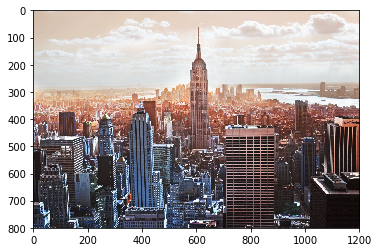

[{'Name': 'Town',
  'Confidence': 99.81415557861328,
  'Instances': [],
  'Parents': [{'Name': 'Urban'}, {'Name': 'Building'}]},
 {'Name': 'Building',
  'Confidence': 99.81415557861328,
  'Instances': [],
  'Parents': []},
 {'Name': 'City',
  'Confidence': 99.81415557861328,
  'Instances': [],
  'Parents': [{'Name': 'Urban'}, {'Name': 'Building'}]},
 {'Name': 'Urban',
  'Confidence': 99.81415557861328,
  'Instances': [],
  'Parents': []},
 {'Name': 'High Rise',
  'Confidence': 99.79364776611328,
  'Instances': [],
  'Parents': [{'Name': 'City'}, {'Name': 'Urban'}, {'Name': 'Building'}]},
 {'Name': 'Architecture',
  'Confidence': 96.78714752197266,
  'Instances': [],
  'Parents': [{'Name': 'Building'}]},
 {'Name': 'Downtown',
  'Confidence': 91.29037475585938,
  'Instances': [],
  'Parents': [{'Name': 'City'}, {'Name': 'Urban'}, {'Name': 'Building'}]},
 {'Name': 'Office Building',
  'Confidence': 84.95169067382812,
  'Instances': [],
  'Parents': [{'Name': 'Building'}]},
 {'Name': 'Skys

In [5]:
filename = 'new-york-city.jpg'
show_image(filename)
detect_image_entities(filename)

In [30]:
def detect_image_text(filename):
    rekognition = boto3.client('rekognition')
    # Read image array
    image = cv2.imread(filename)
    # Encode Image
    encoded = image_encoder(image)
    # Send to rekognition
    response = rekognition.detect_text(
        Image = encoded
    )
    return response['TextDetections']

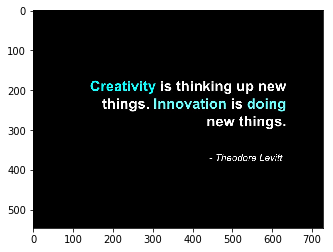

[{'DetectedText': 'Creativity is thinking up new',
  'Type': 'LINE',
  'Id': 0,
  'Confidence': 99.75479888916016,
  'Geometry': {'BoundingBox': {'Width': 0.6815280914306641,
    'Height': 0.07347665727138519,
    'Left': 0.19232335686683655,
    'Top': 0.31113672256469727},
   'Polygon': [{'X': 0.19232335686683655, 'Y': 0.31113672256469727},
    {'X': 0.873851478099823, 'Y': 0.3160271942615509},
    {'X': 0.8735548853874207, 'Y': 0.3895038366317749},
    {'X': 0.1920267790555954, 'Y': 0.38461336493492126}]}},
 {'DetectedText': 'things. Innovation is doing',
  'Type': 'LINE',
  'Id': 1,
  'Confidence': 99.89435577392578,
  'Geometry': {'BoundingBox': {'Width': 0.6374279856681824,
    'Height': 0.07039864361286163,
    'Left': 0.23345038294792175,
    'Top': 0.3959132134914398},
   'Polygon': [{'X': 0.23345038294792175, 'Y': 0.3959132134914398},
    {'X': 0.8708783388137817, 'Y': 0.3948027193546295},
    {'X': 0.8709473013877869, 'Y': 0.46520134806632996},
    {'X': 0.23351936042308807,

In [31]:
filename = 'innovation.jpg'
show_image(filename)
detect_image_text(filename)

In [6]:
def analyze_face(filename):
    rekognition = boto3.client('rekognition')
    # Read image array
    image = cv2.imread(filename)
    # Encode Image
    encoded = image_encoder(image)
    # Send to rekognition
    response = rekognition.detect_faces(
        Image = encoded,
        Attributes=[
            'ALL',
        ]
    )
    return response['FaceDetails']

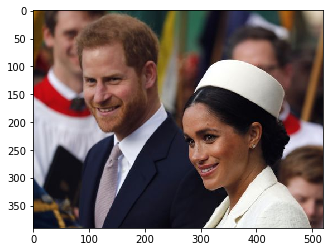

[{'BoundingBox': {'Width': 0.21133017539978027,
   'Height': 0.380750447511673,
   'Left': 0.5257187485694885,
   'Top': 0.44783762097358704},
  'AgeRange': {'Low': 26, 'High': 43},
  'Smile': {'Value': True, 'Confidence': 99.82453918457031},
  'Eyeglasses': {'Value': False, 'Confidence': 99.99889373779297},
  'Sunglasses': {'Value': False, 'Confidence': 99.99979400634766},
  'Gender': {'Value': 'Female', 'Confidence': 99.2874755859375},
  'Beard': {'Value': False, 'Confidence': 99.78056335449219},
  'Mustache': {'Value': False, 'Confidence': 99.9768295288086},
  'EyesOpen': {'Value': True, 'Confidence': 99.96916961669922},
  'MouthOpen': {'Value': True, 'Confidence': 99.81885528564453},
  'Emotions': [{'Type': 'ANGRY', 'Confidence': 2.122377395629883},
   {'Type': 'CALM', 'Confidence': 0.5727126002311707},
   {'Type': 'CONFUSED', 'Confidence': 1.6996568441390991},
   {'Type': 'DISGUSTED', 'Confidence': 4.526241302490234},
   {'Type': 'SAD', 'Confidence': 0.8622157573699951},
   {'Type

In [8]:
filename = 'harry_megan.JPG'
show_image_rgb(filename)
analyze_face(filename)

In [16]:
def detect_celebrity(filename):
    rekognition = boto3.client('rekognition')
    # Read image array
    image = cv2.imread(filename)
    # Encode Image
    encoded = image_encoder(image)
    # Send to rekognition
    response = rekognition.recognize_celebrities(
        Image = encoded
    )
    return response['CelebrityFaces']

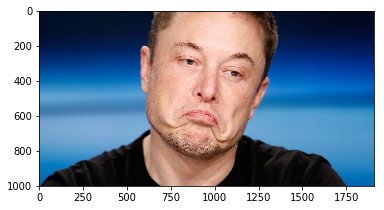

[{'Urls': ['www.imdb.com/name/nm1907769'],
  'Name': 'Elon Musk',
  'Id': '3CI7QV9d',
  'Face': {'BoundingBox': {'Width': 0.44749999046325684,
    'Height': 0.8554360866546631,
    'Left': 0.27125000953674316,
    'Top': -0.06810035556554794},
   'Confidence': 99.99990844726562,
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.443886399269104,
     'Y': 0.291854590177536},
    {'Type': 'eyeRight', 'X': 0.5799576044082642, 'Y': 0.3566484749317169},
    {'Type': 'nose', 'X': 0.5054560899734497, 'Y': 0.4586387872695923},
    {'Type': 'mouthLeft', 'X': 0.4359719157218933, 'Y': 0.5900712013244629},
    {'Type': 'mouthRight', 'X': 0.5277320742607117, 'Y': 0.6463080048561096}],
   'Pose': {'Roll': 13.606098175048828,
    'Yaw': 5.655117511749268,
    'Pitch': 6.161628723144531},
   'Quality': {'Brightness': 75.18667602539062,
    'Sharpness': 96.63640594482422}},
  'MatchConfidence': 100.0}]

In [17]:
filename = 'elon.jpg'
show_image_rgb(filename)
detect_celebrity(filename)

In [25]:
def compare_faces(filename1,filename2):
    rekognition = boto3.client('rekognition')
    # Read image array
    image1 = cv2.imread(filename1)
    image2 = cv2.imread(filename2)
    # Encode Image
    encoded1 = image_encoder(image1)
    encoded2 = image_encoder(image2)
    # Send to rekognition
    response = rekognition.compare_faces(
        SourceImage = encoded1,
        TargetImage = encoded2
    )
    return response['SourceImageFace'], response['FaceMatches'], response['UnmatchedFaces']

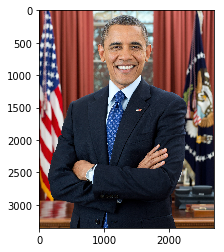

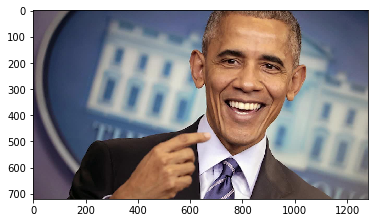

({'BoundingBox': {'Width': 0.2258264422416687,
   'Height': 0.2654648721218109,
   'Left': 0.37881413102149963,
   'Top': 0.07040917128324509},
  'Confidence': 99.99998474121094},
 [{'Similarity': 99.97175598144531,
   'Face': {'BoundingBox': {'Width': 0.2553938925266266,
     'Height': 0.6918839812278748,
     'Left': 0.516389012336731,
     'Top': 0.017053084447979927},
    'Confidence': 99.99998474121094,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.5920029282569885,
      'Y': 0.2747113108634949},
     {'Type': 'eyeRight', 'X': 0.7061968445777893, 'Y': 0.3010968565940857},
     {'Type': 'mouthLeft', 'X': 0.5867652893066406, 'Y': 0.48777255415916443},
     {'Type': 'mouthRight', 'X': 0.6814395785331726, 'Y': 0.509956955909729},
     {'Type': 'nose', 'X': 0.6418721079826355, 'Y': 0.40228497982025146}],
    'Pose': {'Roll': 6.802429676055908,
     'Yaw': 1.3796035051345825,
     'Pitch': -1.3932188749313354},
    'Quality': {'Brightness': 79.85887145996094,
     'Sharpness': 95.

In [26]:
filename1 = 'obama1.jpg'
filename2 = 'obama2.jpg'

show_image_rgb(filename1)
show_image_rgb(filename2)

compare_faces(filename1,filename2)